## Get bandwidth from cv part files

In [ ]:
#%matplotlib notebook

import glob
import matplotlib.pyplot as plt
import numpy as np
import os.path

from kde_classes import Model, KDE

In [ ]:
gammas = np.concatenate(([1.5], np.linspace(2.0, 3.0, 11)))
# gammas = [1.5]
module = 'sig_psi_E'
model = Model(module, mc=None, weighting='plotter_wkde')
kde = KDE(model)

for gamma in gammas:
    cv_files = glob.glob('output/{module}/adaptive_kd_plotter_wkde_gamma_{gamma}_phi0_1.0/cv/cv_*.npy'.format(module=module, gamma=gamma))

    cv_results_split = np.array([], dtype=kde.cv_result_dtype)

    for cv_file in cv_files:
        cv_result_split = np.load(cv_file)
        cv_results_split = np.append(cv_results_split, cv_result_split)

    # Gather splitted cv results by calculating average values.
    arr, unique_index = np.unique(cv_results_split['bandwidth'], return_index=True,
                                  axis=0)
    cv_results = cv_results_split[unique_index]
    for i, cv_result in enumerate(cv_results):
        matches = cv_results_split[np.all(
            cv_results_split['bandwidth'] == cv_result['bandwidth'], axis=1)]
        cv_results['LLH'][i] = np.average(matches['LLH'])
        cv_results['Zeros'][i] = np.average(matches['Zeros'])
    cv_results_max_LLH = cv_results[cv_results['LLH'] == np.max(cv_results['LLH'])]
    print("Gamma: {}; CV: {}".format(gamma, cv_results_max_LLH))
    bandwidth = cv_results_max_LLH['bandwidth'][0]

    
    # 3D KDE plots
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    plt.suptitle('$\gamma={}$'.format(gamma))

    tcf0 = ax[0, 0].tricontourf(cv_results['bandwidth'][:, 0], cv_results['bandwidth'][:, 1],
                    cv_results['LLH'], 50)
    fig.colorbar(tcf0, ax=ax[0, 0])
    ax[0, 0].scatter(bandwidth[0], bandwidth[1], marker='x', label=bandwidth)
    ax[0, 0].set_xlabel('bw of sigma_pull_corrected')
    ax[0, 0].set_ylabel('bw of psi')
    ax[0, 0].legend()
    
    tcf1 = ax[0, 1].tricontourf(cv_results['bandwidth'][:, 1], cv_results['bandwidth'][:, 2],
                    cv_results['LLH'], 50)
    fig.colorbar(tcf1, ax=ax[0, 1])
    ax[0, 1].scatter(bandwidth[1], bandwidth[2], marker='x', label=bandwidth)
    ax[0, 1].set_xlabel('bw of psi')
    ax[0, 1].set_ylabel('bw of log_e')
    ax[0, 1].legend()
    
    tcf2 = ax[0, 2].tricontourf(cv_results['bandwidth'][:, 2], cv_results['bandwidth'][:, 0],
                    cv_results['LLH'], 50)
    fig.colorbar(tcf2, ax=ax[0, 2])
    ax[0, 2].scatter(bandwidth[2], bandwidth[0], marker='x', label=bandwidth)
    ax[0, 2].set_xlabel('bw of log_e')
    ax[0, 2].set_ylabel('bw of sigma_pull_corrected')
    ax[0, 2].legend()
    
    tcf3 = ax[1, 0].tricontourf(cv_results['bandwidth'][:, 0], cv_results['bandwidth'][:, 2],
                    cv_results['LLH'], 50)
    fig.colorbar(tcf0, ax=ax[1, 0])
    ax[1, 0].scatter(bandwidth[0], bandwidth[2], marker='x', label=bandwidth)
    ax[1, 0].set_xlabel('bw of sigma_pull_corrected')
    ax[1, 0].set_ylabel('bw of log_e')
    ax[1, 0].legend()
    
    tcf4 = ax[1, 1].tricontourf(cv_results['bandwidth'][:, 1], cv_results['bandwidth'][:, 0],
                    cv_results['LLH'], 50)
    fig.colorbar(tcf1, ax=ax[1, 1])
    ax[1, 1].scatter(bandwidth[1], bandwidth[0], marker='x', label=bandwidth)
    ax[1, 1].set_xlabel('bw of psi')
    ax[1, 1].set_ylabel('bw of sigma_pull_corrected')
    ax[1, 1].legend()
    
    tcf5 = ax[1, 2].tricontourf(cv_results['bandwidth'][:, 2], cv_results['bandwidth'][:, 1],
                    cv_results['LLH'], 50)
    fig.colorbar(tcf2, ax=ax[1, 2])
    ax[1, 2].scatter(bandwidth[2], bandwidth[1], marker='x', label=bandwidth)
    ax[1, 2].set_xlabel('bw of log_e')
    ax[1, 2].set_ylabel('bw of psi')
    ax[1, 2].legend()
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)


    ind_0 = np.logical_and(cv_results['bandwidth'][:, 1] == cv_results_max_LLH['bandwidth'][:, 1],
                       cv_results['bandwidth'][:, 2] == cv_results_max_LLH['bandwidth'][:, 2])

    ind_1 = np.logical_and(cv_results['bandwidth'][:, 0] == cv_results_max_LLH['bandwidth'][:, 0],
                       cv_results['bandwidth'][:, 2] == cv_results_max_LLH['bandwidth'][:, 2])
    
    ind_2 = np.logical_and(cv_results['bandwidth'][:, 0] == cv_results_max_LLH['bandwidth'][:, 0],
                       cv_results['bandwidth'][:, 1] == cv_results_max_LLH['bandwidth'][:, 1])

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    plt.suptitle('$\gamma={}$'.format(gamma))
    
    ax[0].plot(cv_results['bandwidth'][:, 0][ind_0], cv_results['LLH'][ind_0])
    ax[0].set_title('bw={}'.format(cv_results_max_LLH['bandwidth'][:, 0][0]))
    ax[0].set_xlabel('bw of sigma_pull_corrected')
    ax[0].set_ylabel('LLH')
    
    ax[1].plot(cv_results['bandwidth'][:, 1][ind_1], cv_results['LLH'][ind_1])
    ax[1].set_title('bw={}'.format(cv_results_max_LLH['bandwidth'][:, 1][0]))
    ax[1].set_xlabel('bw of psi')
    ax[1].set_ylabel('LLH')
    
    ax[2].plot(cv_results['bandwidth'][:, 2][ind_2], cv_results['LLH'][ind_2])
    ax[2].set_title('bw={}'.format(cv_results_max_LLH['bandwidth'][:, 2][0]))
    ax[2].set_xlabel('bw of log_e')
    ax[2].set_ylabel('LLH')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)


#     # 2D KDE plots
#     plt.figure(dpi=150)
#     plt.tricontourf(cv_results['bandwidth'][:, 0], cv_results['bandwidth'][:, 1],
#                     cv_results['LLH'], 50)
#     plt.colorbar()
#     plt.scatter(bandwidth[0], bandwidth[1], marker='x', label=bandwidth)
#     plt.legend()
#     plt.title('$\gamma$={}'.format(gamma))
#     plt.xlabel('bw of log(sigma_pull_corrected)')
#     plt.ylabel('bw of log_e')

In [ ]:
#np.set_printoptions(threshold=np.inf)
#print(cv_results['LLH'][cv_results['bandwidth'][:, 2] == 0.2])
print(cv_results_max_LLH)
# bandwidth = cv_results_max_LLH['bandwidth']

In [ ]:
for bw in np.unique(cv_results['bandwidth'][:, 2]):
    print(bw)
    print(cv_results[cv_results['bandwidth'][:, 2] == bw])
    print(np.unique(cv_results['bandwidth'][:, 0][cv_results['bandwidth'][:, 2] == bw]))
    if len(np.unique(cv_results['bandwidth'][:, 0][cv_results['bandwidth'][:, 2] == bw])) != 1 and\
            len(np.unique(cv_results['bandwidth'][:, 1][cv_results['bandwidth'][:, 2] == bw])) != 1:
        plt.figure(dpi=150)
        plt.tricontourf(cv_results['bandwidth'][cv_results['bandwidth'][:, 2] == bw][:, 0],
                        cv_results['bandwidth'][cv_results['bandwidth'][:, 2] == bw][:, 1],
                        cv_results['LLH'][cv_results['bandwidth'][:, 2] == bw],
                        50)
        plt.colorbar()
        # plt.scatter(bandwidth[1], bandwidth[2], marker='x', label=bandwidth)
        plt.title('$\gamma$={}, bw of log_e={:.2f}'.format(gamma, bw))
        plt.xlabel('bw of sigma_pull_corrected')
        plt.ylabel('bw of psi')
        #plt.legend()


In [ ]:
plt.figure(dpi=150)
plt.plot(cv_results['bandwidth'][:, 1], cv_results['LLH'])
plt.title('$\gamma$={}'.format(gamma))
plt.xlabel('bw of psi')
plt.ylabel('LLH')

## Plot contours of CV

In [ ]:
plt.figure(dpi=150)
plt.tricontourf(cv_results['bandwidth'][:, 0], cv_results['bandwidth'][:, 1],
                cv_results['LLH'], 50)
plt.colorbar()
plt.scatter(bandwidth[0], bandwidth[1], marker='x', label=bandwidth)
plt.legend()
plt.title('$\gamma$={}'.format(gamma))
plt.xlabel('bw of log(sigma_pull_corrected)')
plt.ylabel('bw of log_e')

In [ ]:
from scipy.interpolate import griddata

x = cv_results['bandwidth'][:, 0]
y = cv_results['bandwidth'][:, 1]
z =  cv_results['LLH']

xi = np.unique(x)
yi = np.unique(y)
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')

plt.figure(dpi=150)
plt.contourf(xi, yi, zi, 20)
plt.colorbar()
plt.scatter(bandwidth[0], bandwidth[1], marker='x', label=bandwidth)
plt.legend()

## dataset_8yr_fit_IC86_2012_16_MC_2017_09_29_more_fields names

In [ ]:
mc = np.load('/home/ge56lag/Data/dataset_8yr_fit_IC86_2012_16_MC_2017_09_29_more_fields.npy')
mc.dtype.names

In [ ]:
np.linspace(0.01, 0.25, 5)

In [ ]:
np.geomspace(0.01, 0.25, 5)

In [ ]:
import cPickle as pickle
import glob
import itertools
import numpy as np
import os.path

from kde_classes import Model, KDE

model = Model('dec', mc=None, weighting=None)
kde = KDE(model)

cv_files = glob.glob('output/dec/temp/cv_*.npy')
cv_results_split = np.array([], dtype=kde.cv_result_dtype)
#cv_results = np.array([], dtype=kde.cv_result_dtype)

for cv_file in cv_files:
    cv_result_split = np.load(cv_file)
    cv_results_split = np.append(cv_results_split, cv_result_split)

# Gather splitted cv results by calculating average values.
arr, unique_index = np.unique(cv_results_split['bandwidth'], return_index=True,
                              axis=0)
cv_results = cv_results_split[unique_index]
for i, cv_result in enumerate(cv_results):
    matches = cv_results_split[np.all(
        cv_results_split['bandwidth'] == cv_result['bandwidth'], axis=1)]
    cv_results['LLH'][i] = np.average(matches['LLH'])
    cv_results['Zeros'][i] = np.average(matches['Zeros'])

cv_results_max_LLH = cv_results[cv_results['LLH'] == np.max(cv_results['LLH'])]

print(cv_results_max_LLH)
#bandwidth = [cv_results_max_LLH[key] for key in model.bandwidth_vars]


In [ ]:
cv_results_split

In [ ]:
cv_results

In [ ]:
import os
import logging
import numpy as np
import time
from datetime import timedelta

# Logging setup utilities
from debugging import (
    setup_logger,
    setup_console_handler
)

from kde_classes import Model, KDE

from ROOT import BinnedDensity

setup_logger('KDE', logging.DEBUG)
setup_console_handler('KDE', logging.DEBUG)
logger = logging.getLogger('KDE.' + __name__)

start_time = time.time()

model = Model('sig_psi_E', mc=None, weighting='plotter_wkde',
              gamma=2.0, phi0=1.0)
kde = KDE(model)

if False:
    if True:
        kde.set_kfold_subset(0)
        binned_kernel = kde.generate_binned_kd((0.09, 0.32, 0.26))
    else:
        binned_kernel = kde.generate_binned_kd((0.09, 0.32, 0.26))

    binned_kernel.writeToFile('/var/tmp/binned_kd_sig_psi_E_0.090,0.320,0.260_0.txt')
else:
    seed_path = '/home/ge56lag/Software/KDE/output/sig_psi_E/adaptive_kd_plotter_wkde_gamma_2.0_phi0_1.0/cv/binned_kd_sig_psi_E_0.090,0.320,0.260_0.txt'
    if os.path.exists(seed_path):
        pdf_seed = BinnedDensity('BinnedKernelDensity', kde.space, seed_path)
        print('seed loaded')
    else:
        pdf_seed = None

    if True:
        result = kde.cross_validate_split((0.09, 0.32, 0.26), 0,
            adaptive=True, pdf_seed=pdf_seed)
    else:
        result = kde.cross_validate((0.09, 0.32, 0.26), adaptive=True,
                                    pdf_seed=pdf_seed)

    np.save("/var/tmp/cv_0_0.npy", result)

elapsed_time = time.time() - start_time
logger.debug('Elapsed time %s', timedelta(seconds=elapsed_time))

18.08 100 bins sig_E

Gamma: 1.5; CV: [([0.14, 0.37], -1.6083753, 0.)]
Gamma: 2.0; CV: [([0.1 , 0.18], -1.3323385, 0.)]
Gamma: 2.1; CV: [([0.1 , 0.12], -1.2647438, 0.)]
Gamma: 2.2; CV: [([0.1 , 0.13], -1.1974131, 0.)]
Gamma: 2.3; CV: [([0.1 , 0.13], -1.1312201, 0.)]
Gamma: 2.4; CV: [([0.09, 0.13], -1.0667514, 0.)]
Gamma: 2.5; CV: [([0.09, 0.13], -1.0044644, 0.)]
Gamma: 2.6; CV: [([0.09, 0.13], -0.94482243, 0.)]
Gamma: 2.7; CV: [([0.08, 0.08], -0.88819945, 0.)]
Gamma: 2.8; CV: [([0.08, 0.08], -0.834888, 0.)]
Gamma: 2.9; CV: [([0.08, 0.08], -0.7851407, 0.)]
Gamma: 3.0; CV: [([0.08, 0.08], -0.7390723, 0.)]

# Plotter wkde

In [3]:
#%matplotlib notebook

import importlib

found 5182 matching events.
59 events, or 0.0113855654188 % are out of plotting range
11 events, or 0.0021227325357 % are out of histogram bounds
[4.579782377346181, 3.8498974700042443, 3.734534285544038, 3.603425070698006, 2.6623144651475386, 2.615604451487949, 2.4413662418416813, 1.8830047865009145, 1.6858626316066183, 1.536340525357959, 1.5306389167697814]


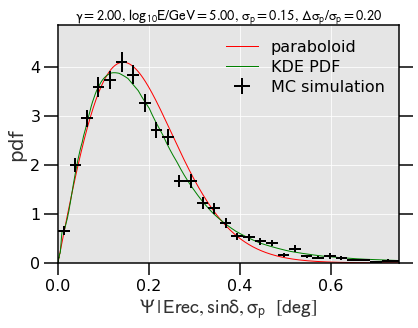

Calculating spline basis...
Reticulating splines...
	Convolving bases...
		Convolving dimension 0
		Convolving dimension 1
		Convolving dimension 2
	Flattening residuals matrix...
Transforming fit array...
Computing least square solution...
Analyze[941192]: 0.160000 s
Factorize[941192]: 0.060000 s
Solve[941192]: 0.010000 s
Done: cleaning up


<Figure size 432x288 with 0 Axes>

In [8]:
plotter_wkde = importlib.import_module('plotter_wkde')

gammas = [2.0]
logE = 5.0
sigma_p = 0.15

for gamma in gammas:
    spatial_KDE_path = '/home/ge56lag/Software/KDE/output/sig_psi_E/adaptive_kd_plotter_wkde_gamma_{}_phi0_1.0/pdf/sig_psi_E.pkl'.format(gamma)
    norm_KDE_path = '/home/ge56lag/Software/KDE/output/sig_E/adaptive_kd_plotter_wkde_gamma_{}_phi0_1.0/pdf/sig_E.pkl'.format(gamma)

    spatial_pdf, mc = plotter_wkde.setup(spatial_KDE_path, norm_KDE_path)

    plotter_wkde.make_plot(spatial_pdf, mc,logE , sigma_p, gamma=gamma, delta_sigma=0.2, show_quantile=False)